In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data=pd.read_csv('titanic.csv',header=None,usecols=[5,9])
data.columns=['Age','Fare']
data.tail()

,Age,Fare
887,27,13
888,19,30
889,NaN,23.45
890,26,30
891,32,7.75


In [3]:
data.isnull().sum()

Age     177
Fare      0
dtype: int64

In [11]:
data = data.fillna(data.median())

In [12]:
data.fillna(data.median(numeric_only=True).round(1), inplace=True)
data = data.iloc[1:,:]
data

,Age,Fare
2,38,71.2833
3,26,7.925
4,35,53.1
5,35,8.05
6,28.0,8.4583
...,...,...
887,27,13
888,19,30
889,28.0,23.45
890,26,30


<AxesSubplot:xlabel='Age', ylabel='Density'>

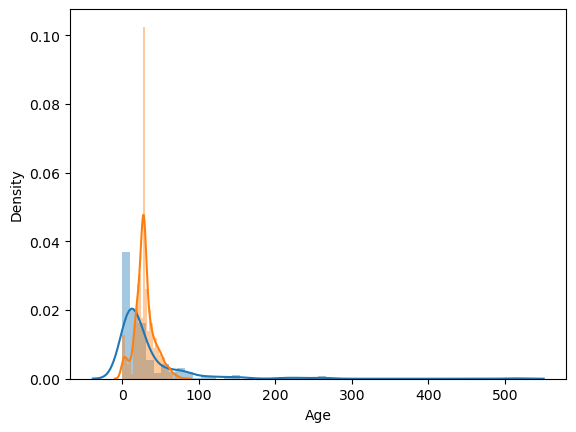

In [14]:
sns.distplot(data['Fare'],kde=True)
sns.distplot(data['Age'],kde=True)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop('Age',axis=1),data['Age'],test_size=0.3,random_state=0)

In [26]:
x_train.shape,x_test.shape

((623, 1), (267, 1))

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [28]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_train_scaled,columns=x_test.columns)

In [29]:
np.round(x_train.describe(),1)

,Fare
count,623
unique,221
top,8.05
freq,34


In [20]:
np.round(y_train.describe(),1)

count     623.0
unique     83.0
top        28.0
freq      117.0
Name: Age, dtype: float64

In [21]:
np.round(x_train_scaled.describe(),1)

,Fare
count,623.0
mean,0.1
std,0.1
min,0.0
25%,0.0
50%,0.0
75%,0.1
max,1.0


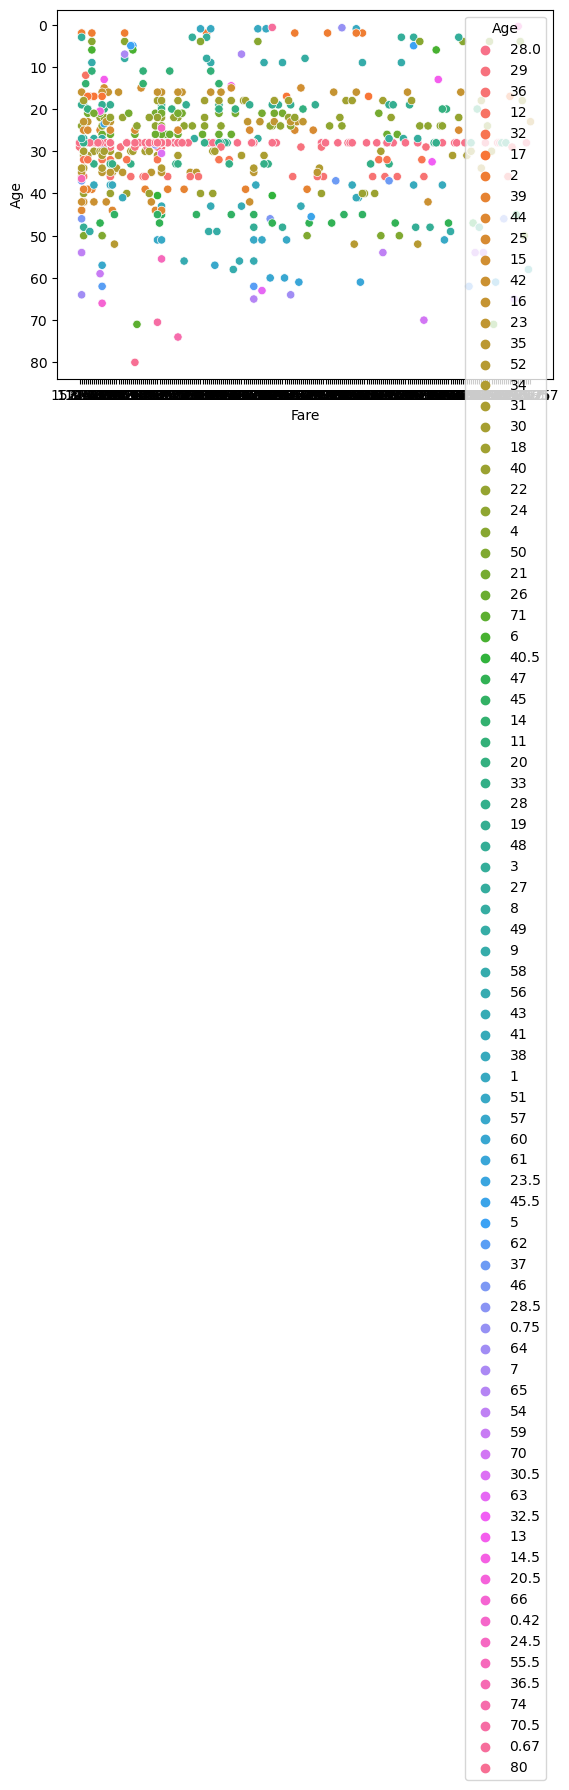

In [31]:
sns.scatterplot(x_train['Fare'],y_train,hue=y_train)
plt.show()